# Aula 10 - Qui Quadrado e Regressão Logística

À partir da base de dados juri.xlsx faça as seguintes análises:

- Considere: veredito é uma variável categórica onde 0 = não pena de morte e 1 = pena de morte
- As variáveis independentes são escalas lineares de valores de 0 a 10.

In [21]:
import pandas as pd
import pingouin
import seaborn as sns

In [3]:
juri = pd.read_excel('../data/juri.xlsx')

In [4]:
juri.head()

,subject,verdict,danger,rehab,punish,gendet,specdet,incap
0,1,0,2,2,2,2,0,7
1,2,0,0,9,0,6,8,2
2,3,1,6,3,2,10,10,4
3,4,1,1,3,2,3,2,1
4,5,0,0,7,4,1,1,10


## PARTE 1 - Modelo de Regressão Logística Nominal

Previsão do veredito à partir das 6 variáveis 

Responda:

1. Qual a significância do modelo (Prob>ChiSq)?
2. Considerando os coeficientes de regressão, quais variáveis são significativas como forma de prever o veredito? Quais os respectivos coeficientes e significâncias?
3. Execute os testes de Wald para as variáveis (Triângulo vermelho ao lado de 'Nominal Logistic Fit for verdict'). Qual o Qui-quadrado (Wald ChiSquare) de 'danger'?
4. De acordo com este modelo, qual o incremento de probabilidade do veredito de pena de morte para cada unidade de periculosidade (rehab)?

In [19]:
# Regressão Logística Múltipla Binária
X = juri[['danger', 'rehab', 'punish', 'gendet', 'specdet', 'incap']] # Variáveis preditoras
y = juri['verdict'] # Variável dependente binária [0, 1]
lom = pingouin.logistic_regression(X, y, remove_na=True)
lom.round(2)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.75,0.92,-1.91,0.06,-3.55,0.05
1,danger,0.29,0.09,3.16,0.00,0.11,0.48
2,rehab,-0.19,0.08,-2.31,0.02,-0.35,-0.03
3,punish,0.07,0.07,0.99,0.32,-0.07,0.21
4,gendet,0.19,0.08,2.40,0.02,0.03,0.34
5,specdet,0.01,0.08,0.08,0.94,-0.15,0.16
6,incap,0.00,0.08,0.05,0.96,-0.15,0.15


<AxesSubplot: >

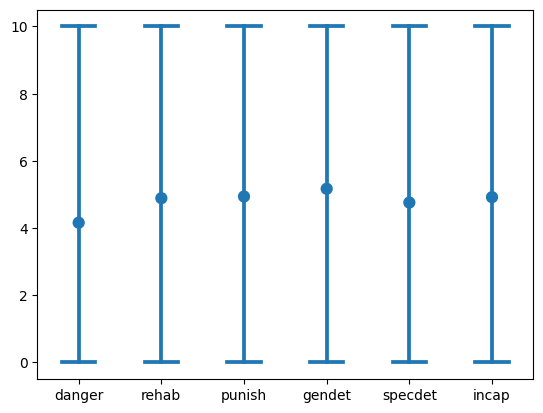

In [34]:
sns.pointplot(
    data=juri[['danger', 'rehab', 'punish', 'gendet', 'specdet', 'incap']],
    errorbar=("pi", 100), capsize=.4, join=False,)

In [7]:
# Teste de independência Chi-quadrado: A variável x independe de y?
expected, observed, stats = pingouin.chi2_independence(data=juri, x='verdict',
y='danger', correction=False)
print(stats)

                 test    lambda       chi2   dof      pval    cramer     power
0             pearson  1.000000  18.923347  10.0  0.041247  0.435010  0.868967
1        cressie-read  0.666667  19.633344  10.0  0.032918  0.443095  0.883531
2      log-likelihood  0.000000  23.423537  10.0  0.009287  0.483979  0.940215
3       freeman-tukey -0.500000        NaN  10.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  10.0  0.000000       inf  1.000000
5              neyman -2.000000        NaN  10.0       NaN       NaN       NaN


/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7169: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7169: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7166: RuntimeWarning: divide by zero encountered in divide
  te

<AxesSubplot: xlabel='verdict'>

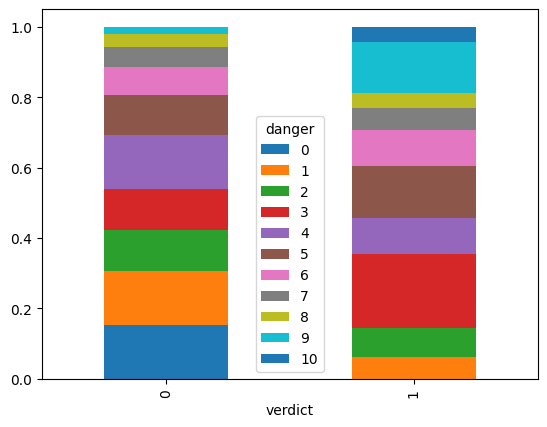

In [10]:
# Visualização exploratoria de proporções - gráfico de barras 100% empilhadas
props = juri.groupby('verdict')['danger'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

<AxesSubplot: xlabel='danger'>

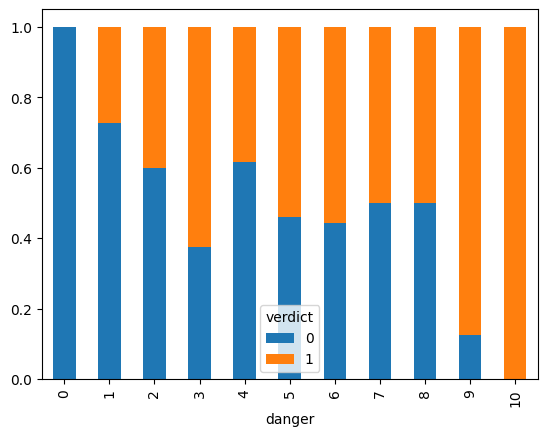

In [12]:
# Visualização exploratoria de proporções - gráfico de barras 100% empilhadas
props = juri.groupby('danger')['verdict'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

In [14]:
# Teste de dupla independência Chi-quadrado: As variáveis x e y são independentes entre si?
expected, observed, stats = pingouin.chi2_independence(data=juri, x='verdict', y='danger')
print(stats[stats['test'] == 'pearson'])

      test  lambda       chi2   dof      pval   cramer     power
0  pearson     1.0  18.923347  10.0  0.041247  0.43501  0.868967


/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7169: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7169: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7166: RuntimeWarning: divide by zero encountered in divide
  te

## PARTE 2: Modelo de Regressão Logística Nominal

Previsão do veredito à partir das variáveis periculosidade (danger), reabilitação (rehab) e dissuasão geral (gendet)

Responda:
1. Qual a significância do modelo (Prob>ChiSq)?
2. Considerando os coeficientes de regressão, quais os coeficientes e significâncias das variáveis? São iguais ou diferentes do modelo anterior? Porquê?
3. De acordo com este modelo, qual o incremento de probabilidade do veredito de pena de morte para cada unidade de periculosidade (rehab)?

In [20]:
# Regressão Logística Múltipla Binária
X = juri[['danger', 'rehab', 'gendet']] # Variáveis preditoras
y = juri['verdict'] # Variável dependente binária [0, 1]
lom = pingouin.logistic_regression(X, y, remove_na=True)
lom.round(2)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.35,0.68,-1.97,0.05,-2.69,-0.01
1,danger,0.28,0.09,3.15,0.00,0.11,0.45
2,rehab,-0.18,0.08,-2.24,0.02,-0.34,-0.02
3,gendet,0.19,0.08,2.46,0.01,0.04,0.34


https://medium.com/@ginoasuncion/visualizing-logistic-regression-results-using-a-forest-plot-in-python-bc7ba65b55bb